# Data Science (Simple Data Source)
# By Ryuzeen (https://github.com/ryuzeen)


In [14]:
import pandas as pd
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

In [2]:
# Carregar o dataframe
df = pd.read_csv('CP3 Cars.csv')

# 1. Filtrar carros da Volkswagen e Renault
vw_renault = df[(df['manufacturer_name'] == 'Volkswagen') | (df['manufacturer_name'] == 'Renault')]

# 2. Realizar teste t para comparar os preços dos carros Volkswagen e Renault
vw_prices = vw_renault[vw_renault['manufacturer_name'] == 'Volkswagen']['price_usd']
renault_prices = vw_renault[vw_renault['manufacturer_name'] == 'Renault']['price_usd']
t_statistic, p_value = stats.ttest_ind(vw_prices, renault_prices)

# 3. Interpretar os resultados
alpha = 0.05
if p_value < alpha:
    print("Há diferença significativa nos preços dos carros entre Volkswagen e Renault (p < 0.05).")
else:
    print("Não há diferença significativa nos preços dos carros entre Volkswagen e Renault (p >= 0.05).")

# 4. Teste t para comparar os preços dos carros Renault e Audi
renault_audi = df[(df['manufacturer_name'] == 'Renault') | (df['manufacturer_name'] == 'Audi')]
renault_prices = renault_audi[renault_audi['manufacturer_name'] == 'Renault']['price_usd']
audi_prices = renault_audi[renault_audi['manufacturer_name'] == 'Audi']['price_usd']
t_statistic, p_value = stats.ttest_ind(renault_prices, audi_prices)

# Interpretar os resultados
if p_value < alpha:
    print("Há diferença significativa nos preços dos carros entre Renault e Audi (p < 0.05).")
else:
    print("Não há diferença significativa nos preços dos carros entre Renault e Audi (p >= 0.05).")

# Há diferença significativa nos preços dos carros entre Volkswagen e Renault (p < 0.05).
# Há diferença significativa nos preços dos carros entre Renault e Audi (p < 0.05).

Há diferença significativa nos preços dos carros entre Volkswagen e Renault (p < 0.05).
Há diferença significativa nos preços dos carros entre Renault e Audi (p < 0.05).


In [3]:
# Carregar o dataframe
df = pd.read_csv('CP3 Cars.csv')

# Filtrar carros da BMW e Toyota
bmw_toyota = df[(df['manufacturer_name'] == 'BMW') | (df['manufacturer_name'] == 'Toyota')]

# Realizar teste t para comparar os preços dos carros BMW e Toyota
bmw_prices = bmw_toyota[bmw_toyota['manufacturer_name'] == 'BMW']['price_usd']
toyota_prices = bmw_toyota[bmw_toyota['manufacturer_name'] == 'Toyota']['price_usd']
t_statistic, p_value = stats.ttest_ind(bmw_prices, toyota_prices)

# Interpretar os resultados
alpha = 0.05
if p_value < alpha:
    print("Há diferença significativa nos preços dos carros entre BMW e Toyota (p < 0.05).")
else:
    print("Não há diferença significativa nos preços dos carros entre BMW e Toyota (p >= 0.05).")

# Teste t para comparar os preços dos carros BMW e Mercedes-Benz
bmw_mercedes = df[(df['manufacturer_name'] == 'BMW') | (df['manufacturer_name'] == 'Mercedes-Benz')]
bmw_prices = bmw_mercedes[bmw_mercedes['manufacturer_name'] == 'BMW']['price_usd']
mercedes_prices = bmw_mercedes[bmw_mercedes['manufacturer_name'] == 'Mercedes-Benz']['price_usd']
t_statistic, p_value = stats.ttest_ind(bmw_prices, mercedes_prices)

# Interpretar os resultados
if p_value < alpha:
    print("Há diferença significativa nos preços dos carros entre BMW e Mercedes-Benz (p < 0.05).")
else:
    print("Não há diferença significativa nos preços dos carros entre BMW e Mercedes-Benz (p >= 0.05).")

    # Não há diferença significativa nos preços dos carros entre BMW e Toyota (p >= 0.05).
    # Não há diferença significativa nos preços dos carros entre BMW e Mercedes-Benz (p >= 0.05).

Não há diferença significativa nos preços dos carros entre BMW e Toyota (p >= 0.05).
Não há diferença significativa nos preços dos carros entre BMW e Mercedes-Benz (p >= 0.05).


In [4]:
# Carregar o dataframe
df = pd.read_csv('CP3 Cars.csv')

# Filtrar carros com transmissão automática e mecânica
automatic_cars = df[df['transmission'] == 'automatic']
mechanical_cars = df[df['transmission'] == 'mechanical']

# Realizar teste t para comparar os preços dos carros com transmissão automática e mecânica
t_statistic_price, p_value_price = stats.ttest_ind(automatic_cars['price_usd'], mechanical_cars['price_usd'])

# Interpretar os resultados para os preços
alpha = 0.05
if p_value_price < alpha:
    print("Há diferença significativa nos preços dos carros de acordo com a transmissão (p < 0.05).")
else:
    print("Não há diferença significativa nos preços dos carros de acordo com a transmissão (p >= 0.05).")

# Realizar teste t para comparar o valor do hodômetro dos carros com transmissão automática e mecânica
t_statistic_odometer, p_value_odometer = stats.ttest_ind(automatic_cars['odometer_value'], mechanical_cars['odometer_value'])

# Interpretar os resultados para a quilometragem
if p_value_odometer < alpha:
    print("Há diferença significativa na quilometragem dos carros de acordo com a transmissão (p < 0.05).")
else:
    print("Não há diferença significativa na quilometragem dos carros de acordo com a transmissão (p >= 0.05).")

    # Há diferença significativa nos preços dos carros de acordo com a transmissão (p < 0.05).
    # Há diferença significativa na quilometragem dos carros de acordo com a transmissão (p < 0.05).

Há diferença significativa nos preços dos carros de acordo com a transmissão (p < 0.05).
Há diferença significativa na quilometragem dos carros de acordo com a transmissão (p < 0.05).


In [5]:
# Carregar o dataframe
df = pd.read_csv('CP3 Cars.csv')

# Realizar o teste ANOVA para comparar os preços dos carros com diferentes tipos de motor
anova_results = f_oneway(
    df[df['engine_type'] == 'diesel']['price_usd'],
    df[df['engine_type'] == 'gasoline']['price_usd'],
    df[df['engine_type'] == 'electric']['price_usd']
)

# Interpretar os resultados
alpha = 0.05
if anova_results.pvalue < alpha:
    print("Há diferença significativa nos preços dos carros com diferentes tipos de motor (p < 0.05).")
else:
    print("Não há diferença significativa nos preços dos carros com diferentes tipos de motor (p >= 0.05).")

    # Há diferença significativa nos preços dos carros com diferentes tipos de motor (p < 0.05).

Há diferença significativa nos preços dos carros com diferentes tipos de motor (p < 0.05).


In [6]:
# Carregar o dataframe
df = pd.read_csv('CP3 Cars.csv')

# Contar o número total de observações
total_obs = len(df)

# Contar o número de carros fabricados em 2000 e 2001
num_cars_2000 = len(df[df['year_produced'] == 2000])
num_cars_2001 = len(df[df['year_produced'] == 2001])

# Teste de proporção para carros fabricados em 2000
z_stat_2000, p_value_2000 = proportions_ztest(count=num_cars_2000, nobs=total_obs, value=0.05)

# Teste de proporção para carros fabricados em 2001
z_stat_2001, p_value_2001 = proportions_ztest(count=num_cars_2001, nobs=total_obs, value=0.05)

# Interpretar os resultados
alpha = 0.05
if p_value_2000 < alpha:
    print("A proporção de carros fabricados em 2000 é significativamente diferente de 5%.")
else:
    print("A proporção de carros fabricados em 2000 não é significativamente diferente de 5%.")

if p_value_2001 < alpha:
    print("A proporção de carros fabricados em 2001 é significativamente diferente de 5%.")
else:
    print("A proporção de carros fabricados em 2001 não é significativamente diferente de 5%.")

    # A proporção de carros fabricados em 2000 é significativamente diferente de 5%
    # A proporção de carros fabricados em 2001 não é significativamente diferente de 5%.

A proporção de carros fabricados em 2000 é significativamente diferente de 5%.
A proporção de carros fabricados em 2001 não é significativamente diferente de 5%.


In [7]:
# Carregar o dataframe
df = pd.read_csv('CP3 Cars.csv')

# Filtrar carros da Volkswagen
vw_cars = df[df['manufacturer_name'] == 'Volkswagen']

# Realizar teste t unicaudal para comparar o preço médio dos carros da Volkswagen com US$10.000,00
t_statistic, p_value = stats.ttest_1samp(vw_cars['price_usd'], 10000, alternative='less')

# Interpretar os resultados
alpha = 0.05
if p_value < alpha:
    print("O preço médio dos carros da Volkswagen é significativamente menor do que US$10.000,00 (p < 0.05).")
else:
    print("O preço médio dos carros da Volkswagen não é significativamente menor do que US$10.000,00 (p >= 0.05).")

    # O preço médio dos carros da Volkswagen é significativamente menor do que US$10.000,00 (p < 0.05).

O preço médio dos carros da Volkswagen é significativamente menor do que US$10.000,00 (p < 0.05).


In [8]:
# Carregar o dataframe
df = pd.read_csv('CP3 Cars.csv')

# Criar uma tabela de contingência entre as variáveis transmission e engine_type
contingency_table = pd.crosstab(df['transmission'], df['engine_type'])

# Realizar o teste qui-quadrado de independência
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Interpretar os resultados
alpha = 0.05
if p_value < alpha:
    print("Há dependência entre as variáveis 'transmission' e 'engine_type' (p < 0.05).")
else:
    print("Não há dependência entre as variáveis 'transmission' e 'engine_type' (p >= 0.05).")

    # Há dependência entre as variáveis 'transmission' e 'engine_type' (p < 0.05).

Há dependência entre as variáveis 'transmission' e 'engine_type' (p < 0.05).


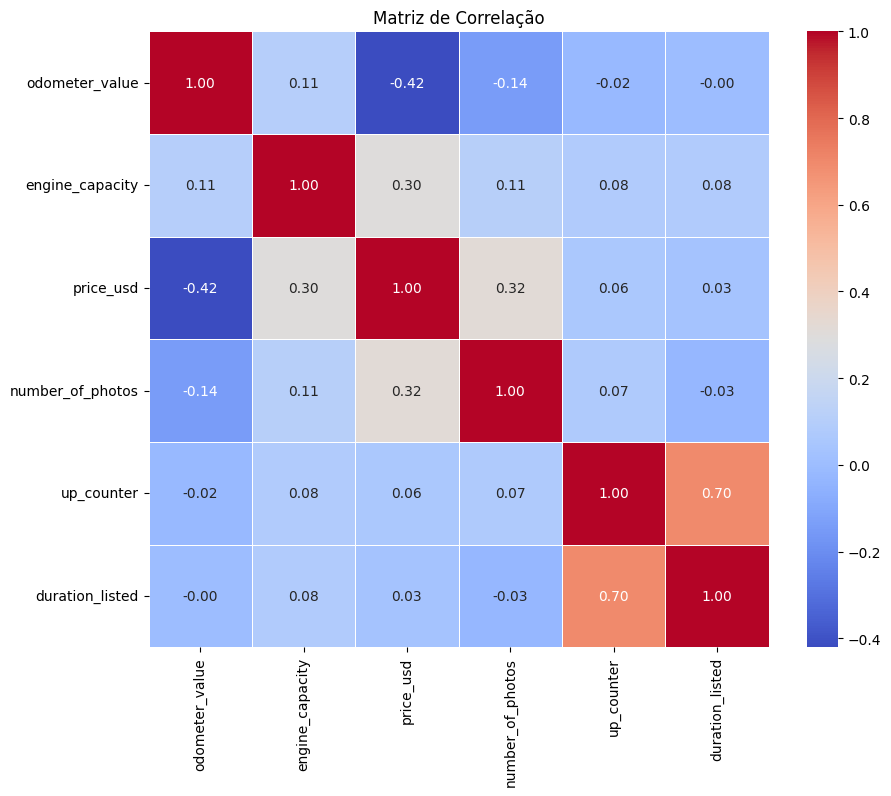

Maior correlação: 0.6981155644552897
Menor correlação: -0.4212043194128441


In [10]:
df = pd.read_csv('CP3 Cars.csv')

# Selecionar as variáveis de interesse
selected_vars = ['odometer_value', 'engine_capacity', 'price_usd', 'number_of_photos', 'up_counter', 'duration_listed']
selected_df = df[selected_vars]

# Calcular a matriz de correlação
correlation_matrix = selected_df.corr()

# Plotar o mapa de calor das correlações
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()

# Encontrar a maior e menor correlação
max_corr = correlation_matrix.unstack().sort_values(ascending=False)[len(selected_vars):][0]
min_corr = correlation_matrix.unstack().sort_values()[0]

print("Maior correlação:", max_corr)
print("Menor correlação:", min_corr)

# Maior correlação: 0.6981155644552897
# Menor correlação: -0.4212043194128441

In [16]:
# Carregar o dataframe
df = pd.read_csv('CP3 Cars.csv')

# Remover linhas com dados ausentes
df.dropna(subset=['odometer_value', 'engine_capacity', 'price_usd'], inplace=True)

# Adicionar uma constante ao dataframe para a interceptação do modelo
df['const'] = 1

# Selecionar as variáveis independentes (odometer_value e engine_capacity) e a variável dependente (price_usd)
X_odometer = df[['const', 'odometer_value']]
X_engine = df[['const', 'engine_capacity']]
y = df['price_usd']

# Inicializar e ajustar o modelo de regressão linear para odometer_value
model_odometer = sm.OLS(y, X_odometer).fit()

# Inicializar e ajustar o modelo de regressão linear para engine_capacity
model_engine = sm.OLS(y, X_engine).fit()

# Interpretar os resultados
print("Regressão linear para odometer_value:")
print(model_odometer.summary())

print("\nRegressão linear para engine_capacity:")
print(model_engine.summary())

Regressão linear para odometer_value:
                            OLS Regression Results                            
Dep. Variable:              price_usd   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.177
Method:                 Least Squares   F-statistic:                     8296.
Date:                Thu, 23 May 2024   Prob (F-statistic):               0.00
Time:                        15:04:21   Log-Likelihood:            -3.8865e+05
No. Observations:               38521   AIC:                         7.773e+05
Df Residuals:                   38519   BIC:                         7.773e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const 

In [19]:
# Carregar o dataframe
df = pd.read_csv('CP3 Cars.csv')

# Remover linhas com dados ausentes nas variáveis de interesse
df.dropna(subset=['odometer_value', 'engine_capacity', 'up_counter', 'year_produced', 'price_usd'], inplace=True)

# Adicionar uma constante ao dataframe para a interceptação do modelo
df['const'] = 1

# Selecionar as variáveis independentes e a variável dependente
X = df[['const', 'odometer_value', 'engine_capacity', 'up_counter', 'year_produced']]
y = df['price_usd']

# Inicializar e ajustar o modelo de regressão linear múltipla
model = sm.OLS(y, X).fit()

# Imprimir o resumo do modelo
print(model.summary())

# Utilizar o modelo para prever o preço de um carro com os valores especificados
new_data = pd.DataFrame({'const': 1, 'odometer_value': [0], 'engine_capacity': [7], 'up_counter': [5], 'year_produced': [2000]})
predicted_price = model.predict(new_data)

print("\nPreço previsto do carro:")
print(predicted_price)

#Preço previsto do carro:
#0    21306.018013

                            OLS Regression Results                            
Dep. Variable:              price_usd   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                 1.443e+04
Date:                Thu, 23 May 2024   Prob (F-statistic):               0.00
Time:                        15:06:30   Log-Likelihood:            -3.7477e+05
No. Observations:               38521   AIC:                         7.496e+05
Df Residuals:                   38516   BIC:                         7.496e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -1.009e+06   5926.002   -1